# Identitas Diri


Nama : Mohammad Dimas Noufal \
Email : dimasnoufal26@gmail.com \
Learning Path : Belajar Pengembangan Machine Learning \
Materi : Proyek Kedua -  Membuat Model Machine Learning dengan Data Time Series \

# Import

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dataset

In [18]:
data = pd.read_csv('austin_weather.csv')
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [19]:
data.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [20]:
data.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,...,29.97,29.91,10,10,10,12,4,20,0,


In [21]:
data.shape

(1319, 21)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [23]:
dates = data['Date'].values
temp  = data['TempAvgF'].values

# Time Series

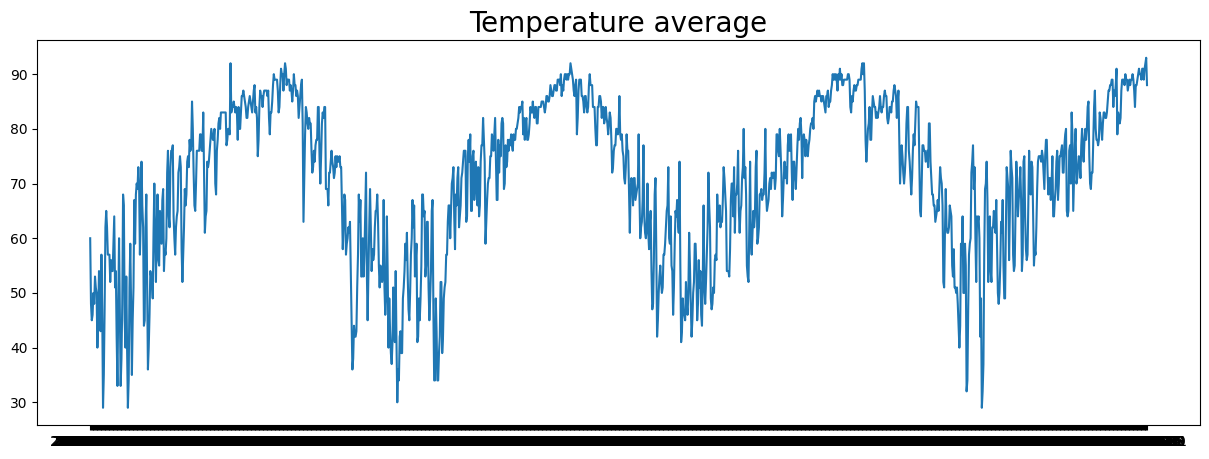

In [24]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average', fontsize=20);

# Nilai Training dan Nilai Testing

In [25]:
date_latih, date_test, temp_latih, temp_test = train_test_split(dates, temp, test_size=0.2, shuffle=False)

print("Nilai Training : ", len(date_latih))
print("Nilai Testing/Validation : ", len(date_test))

Nilai Training :  1055
Nilai Testing/Validation :  264


In [26]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

# Training Model

In [27]:
train_set = windowed_dataset(temp_latih, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(temp_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(30, return_sequences=True,  input_shape=[None, 1]),
  tf.keras.layers.LSTM(30),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [28]:
minMae = (data['TempAvgF'].max() - data['TempAvgF'].min()) * 10/100
print("Batas maksimal nilai mae (10%) dari data adalah sebesar", minMae)

Batas maksimal nilai mae (10%) dari data adalah sebesar 6.4


In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('mae')<minMae) & (logs.get('val_mae') < minMae):
      print('MAE sudah mencapai <10%!')
      self.model.stop_training = True
callbacks = myCallback()

In [31]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.000e-04, momentum=0.9)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=['mae']
    )
history = model.fit(
    train_set,
    epochs=200,
    validation_data=test_set,
    verbose=2,
    callbacks=[callbacks],
    )

Epoch 1/200
10/10 - 6s - loss: 71.4403 - mae: 71.9403 - val_loss: 73.7926 - val_mae: 74.2926 - 6s/epoch - 627ms/step
Epoch 2/200
10/10 - 2s - loss: 71.3616 - mae: 71.8616 - val_loss: 73.6806 - val_mae: 74.1806 - 2s/epoch - 163ms/step
Epoch 3/200
10/10 - 1s - loss: 71.2334 - mae: 71.7334 - val_loss: 73.5427 - val_mae: 74.0427 - 1s/epoch - 124ms/step
Epoch 4/200
10/10 - 1s - loss: 71.1018 - mae: 71.6018 - val_loss: 73.4156 - val_mae: 73.9156 - 929ms/epoch - 93ms/step
Epoch 5/200
10/10 - 1s - loss: 70.9814 - mae: 71.4814 - val_loss: 73.3052 - val_mae: 73.8052 - 942ms/epoch - 94ms/step
Epoch 6/200
10/10 - 1s - loss: 70.8671 - mae: 71.3671 - val_loss: 73.1791 - val_mae: 73.6791 - 919ms/epoch - 92ms/step
Epoch 7/200
10/10 - 1s - loss: 70.7329 - mae: 71.2329 - val_loss: 73.0331 - val_mae: 73.5331 - 927ms/epoch - 93ms/step
Epoch 8/200
10/10 - 1s - loss: 70.5886 - mae: 71.0886 - val_loss: 72.9016 - val_mae: 73.4016 - 939ms/epoch - 94ms/step
Epoch 9/200
10/10 - 1s - loss: 70.4623 - mae: 70.9623 